# spaCy Matcher

In [1]:
import spacy
from spacy.matcher import Matcher

In [2]:
nlp = spacy.load("en_core_web_sm")

Initialize the `Matcher` with capital M with `nlp.vocab` as an argument.

\
The pattern structure here will be slightly different.

In [3]:
matcher = Matcher(nlp.vocab)

#- We are looking for objects that represent emails so we use the built-in LIKE_EMAIL attribute
pattern = [
    {"LIKE_EMAIL": True}
]

#- Now, we add the label that we want to give to such entities. The second argument is a list of lists so we write [pattern]
matcher.add("EMAIL_ADDRESS", [pattern])

Give the doc to the matcher as an argument that will use the defined pattern to find the entities.

We get a list of tuples that will have 3 values each.

In [4]:
doc = nlp("This is an email address: ajain1@unc.edu")

matches = matcher(doc)

In [5]:
print(matches)

[(16571425990740197027, 6, 7)]


**We get an output of the following structure: [ (Lexeme, Start Token, End Token) ]**

**The lexeme corresponds to the LABEL that we gave to objects of this kind: EMAIL_ADDRESS**

In [6]:
print(nlp.vocab[matches[0][0]].text)

EMAIL_ADDRESS


There are several other attributes that we can use:

https://spacy.io/api/matcher

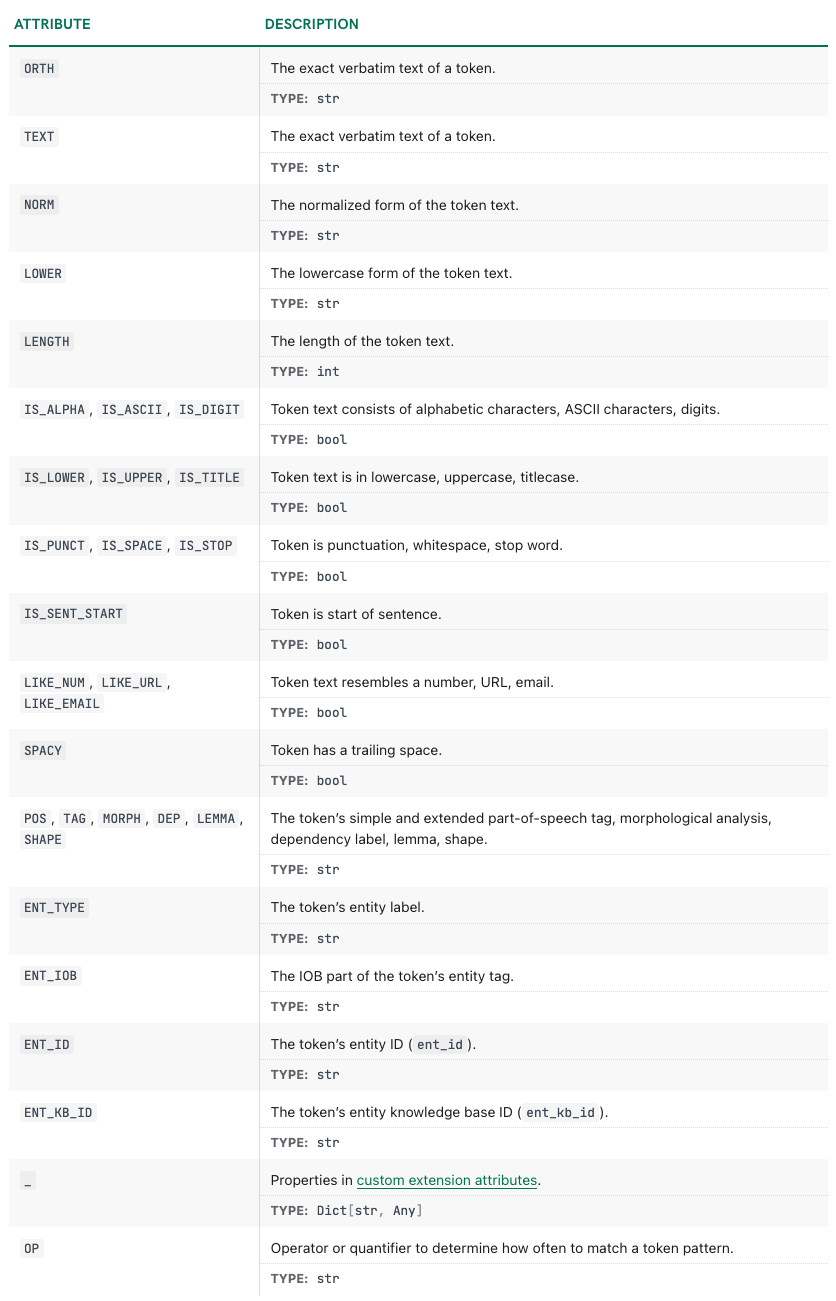

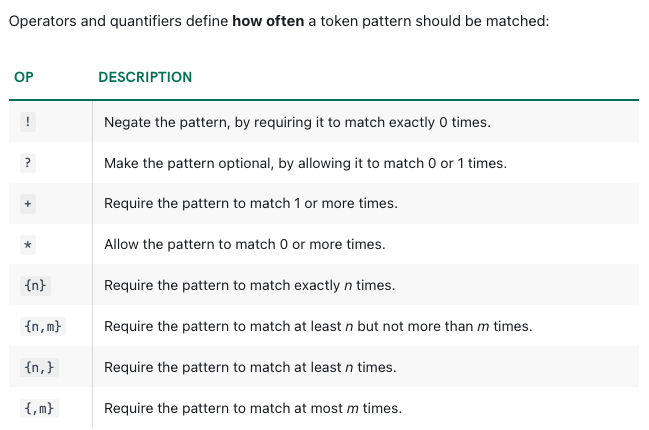

# Using the Matcher

In [7]:
with open ("data/wiki_mlk.txt") as f:
    text = f.read()

print(text)

Martin Luther King Jr. (born Michael King Jr.; January 15, 1929 – April 4, 1968) was an American Baptist minister and activist who became the most visible spokesman and leader in the American civil rights movement from 1955 until his assassination in 1968. King advanced civil rights through nonviolence and civil disobedience, inspired by his Christian beliefs and the nonviolent activism of Mahatma Gandhi. He was the son of early civil rights activist and minister Martin Luther King Sr.

King participated in and led marches for blacks' right to vote, desegregation, labor rights, and other basic civil rights.[1] King led the 1955 Montgomery bus boycott and later became the first president of the Southern Christian Leadership Conference (SCLC). As president of the SCLC, he led the unsuccessful Albany Movement in Albany, Georgia, and helped organize some of the nonviolent 1963 protests in Birmingham, Alabama. King helped organize the 1963 March on Washington, where he delivered his famous 

In [8]:
nlp = spacy.load("en_core_web_sm")
matcher = Matcher(nlp.vocab)

In [9]:
pattern = [
    {"POS": "PROPN"} #- If the Part Of Speech is a Proper Noun
    
]

matcher.add("PROPER_NOUN", [pattern]) #- Give it the PROPER_NOUN label

In [11]:
doc = nlp(text)
matches = matcher(doc)

print(len(matches))
for match in matches[:10]:
    print(match, doc[match[1]:match[2]])

#- match[1] and match[2] correspond to the start index and end index of the matches span in doc
#- Therefore, we are going to those indices in the document and printing out those entities.

102
(451313080118390996, 0, 1) Martin
(451313080118390996, 1, 2) Luther
(451313080118390996, 2, 3) King
(451313080118390996, 3, 4) Jr.
(451313080118390996, 6, 7) Michael
(451313080118390996, 7, 8) King
(451313080118390996, 8, 9) Jr.
(451313080118390996, 10, 11) January
(451313080118390996, 15, 16) April
(451313080118390996, 23, 24) Baptist


### But why just individual entities?

We can see in the above case that the model is picking out individual tokens and not tokens together like "Martin Luther King Jr." as it should.

### How do we fix this? We use an Operator! (OP)

In [12]:

#- Create matcher
matcher = Matcher(nlp.vocab)

#- Create pattern
pattern = [
    {"POS": "PROPN", "OP": "+"} #- The "+" selects the patterns that match at least 1 time
    
]

#- Add pattern to matcher with the relevant label
matcher.add("PROPER_NOUN", [pattern]) #- Give it the PROPER_NOUN label

doc = nlp(text)
matches = matcher(doc)

print(len(matches))
for match in matches[:10]:
    print(match, doc[match[1]:match[2]])

#- match[1] and match[2] correspond to the start index and end index of the matches span in doc
#- Therefore, we are going to those indices in the document and printing out those entities.

175
(451313080118390996, 0, 1) Martin
(451313080118390996, 0, 2) Martin Luther
(451313080118390996, 1, 2) Luther
(451313080118390996, 0, 3) Martin Luther King
(451313080118390996, 1, 3) Luther King
(451313080118390996, 2, 3) King
(451313080118390996, 0, 4) Martin Luther King Jr.
(451313080118390996, 1, 4) Luther King Jr.
(451313080118390996, 2, 4) King Jr.
(451313080118390996, 3, 4) Jr.


### But this causes repetitions!

The above allows us to get multiple token entities but it also causes repetitions.
 
### How do we fix this?

Using the `greedy` parameter!

In [13]:
matcher = Matcher(nlp.vocab)

pattern = [
    {"POS": "PROPN", "OP": "+"}
    
]

matcher.add("PROPER_NOUN", [pattern], greedy="LONGEST") #- Here we, add the LONGEST value for greedy attribute

doc = nlp(text)
matches = matcher(doc)

print(len(matches))
for match in matches[:10]:
    print(match, doc[match[1]:match[2]])

61
(451313080118390996, 83, 88) Martin Luther King Sr.
(451313080118390996, 469, 474) Martin Luther King Jr. Day
(451313080118390996, 536, 541) Martin Luther King Jr. Memorial
(451313080118390996, 0, 4) Martin Luther King Jr.
(451313080118390996, 128, 132) Southern Christian Leadership Conference
(451313080118390996, 247, 251) Director J. Edgar Hoover
(451313080118390996, 6, 9) Michael King Jr.
(451313080118390996, 325, 328) Nobel Peace Prize
(451313080118390996, 422, 425) James Earl Ray
(451313080118390996, 463, 466) Congressional Gold Medal


### But the above tokens are out of order!

### How do we fix this?
Use the `lambda` parameter to sort the matches!

In [14]:
matcher = Matcher(nlp.vocab)

pattern = [
    {"POS": "PROPN", "OP": "+"}
    
]

matcher.add("PROPER_NOUN", [pattern], greedy="LONGEST")

doc = nlp(text)
matches = matcher(doc)

matches.sort(key = lambda x : x[1])

print(len(matches))
for match in matches[:10]:
    print(match, doc[match[1]:match[2]])

61
(451313080118390996, 0, 4) Martin Luther King Jr.
(451313080118390996, 6, 9) Michael King Jr.
(451313080118390996, 10, 11) January
(451313080118390996, 15, 16) April
(451313080118390996, 23, 24) Baptist
(451313080118390996, 49, 50) King
(451313080118390996, 69, 71) Mahatma Gandhi
(451313080118390996, 83, 88) Martin Luther King Sr.
(451313080118390996, 89, 90) King
(451313080118390996, 113, 114) King


# Advanced Matching
### Finding proper nouns followed by a verb

Add a second dictionary to the pattern that says the next Part Of Speech needs to be a verb!

In [15]:
matcher = Matcher(nlp.vocab)

pattern = [
    {"POS": "PROPN", "OP": "+"},
    {"POS": "VERB"}
]

matcher.add("PROPER_NOUN", [pattern], greedy="LONGEST")

doc = nlp(text)
matches = matcher(doc)

matches.sort(key = lambda x : x[1])

print(len(matches))
for match in matches[:10]:
    print(match, doc[match[1]:match[2]])

7
(451313080118390996, 49, 51) King advanced
(451313080118390996, 89, 91) King participated
(451313080118390996, 113, 115) King led
(451313080118390996, 167, 169) King helped
(451313080118390996, 247, 252) Director J. Edgar Hoover considered
(451313080118390996, 322, 324) King won
(451313080118390996, 485, 488) United States beginning


Above, we get all the proper nouns followed by a verb!

In [16]:
import json
with open("data/alice.json", "r") as f:
    data = json.load(f)

In [17]:
text = data[0][2][0]
print(text)

Alice was beginning to get very tired of sitting by her sister on the bank, and of having nothing to do: once or twice she had peeped into the book her sister was reading, but it had no pictures or conversations in it, `and what is the use of a book,' thought Alice `without pictures or conversation?'


### Standardize the text
In the above text, we can see that we have "thought Alice".

This is not going to be captured by our matcher as the pattern follows a strict (1) PRONOUN (2) VERB order.

Also we need to replace the back ticks ` with single quotations ' to **standardize the text**.

In [18]:
text = text.replace("`", "'")
print(text)

Alice was beginning to get very tired of sitting by her sister on the bank, and of having nothing to do: once or twice she had peeped into the book her sister was reading, but it had no pictures or conversations in it, 'and what is the use of a book,' thought Alice 'without pictures or conversation?'


In [19]:
matcher = Matcher(nlp.vocab)

pattern = [
    {"ORTH": "'"}, #- Direct single quotation match
    {"IS_ALPHA": True, "OP": "+"}, #- We want to grab everything in the sentence being spoken and at least one word so +
    {"IS_PUNCT": True, "OP":"*"}, #- We may or may not have a punctuation at the end of the sentence therefore *
    {"ORTH": "'"} #- Ends with a quotation mark
]

matcher.add("SENTENCES", [pattern], greedy="LONGEST")

doc = nlp(text)
matches = matcher(doc)
matches.sort(key = lambda x : x[1])

print(len(matches))
for match in matches[:10]:
    print(match, doc[match[1]:match[2]])

2
(3141386091647652256, 47, 58) 'and what is the use of a book,'
(3141386091647652256, 60, 67) 'without pictures or conversation?'


We found the sentences!

### But who is the speaker?

In [25]:

#* We add the lemma versions of verbs for sentences or thoughts 
speak_lemmas = ["think", "say"]

matcher = Matcher(nlp.vocab)

pattern = [
    {"ORTH": "'"}, #- Direct single quotation match
    {"IS_ALPHA": True, "OP": "+"}, #- We want to grab everything in the sentence being spoken and at least one word so +
    {"IS_PUNCT": True, "OP":"*"}, #- We may or may not have a punctuation at the end of the sentence therefore *
    {"ORTH": "'"}, #- Ends with a quotation mark
    {"POS": "VERB", "LEMMA": {"IN": speak_lemmas}}, #* The single quotation is followed by one of the verbs
    {"POS": "PROPN", "OP": "+"}, #* This is going to be the person's name who said or thought something
    #* The following is to get the full quote if there is something they said after as well.
    {"ORTH": "'"}, #- Direct single quotation match
    {"IS_ALPHA": True, "OP": "+"}, #- We want to grab everything in the sentence being spoken and at least one word so +
    {"IS_PUNCT": True, "OP":"*"}, #- We may or may not have a punctuation at the end of the sentence therefore *
    {"ORTH": "'"}, #- Ends with a quotation mark
]

matcher.add("SENTENCES", [pattern], greedy="LONGEST")

doc = nlp(text)
matches = matcher(doc)
matches.sort(key = lambda x : x[1])

print(len(matches))
for match in matches[:10]:
    print(match, doc[match[1]:match[2]])

1
(3141386091647652256, 47, 67) 'and what is the use of a book,' thought Alice 'without pictures or conversation?'


We have extracted the full quote!

### Let us go over the full chapter now

In [27]:
for text in data[0][2]:
    text = text.replace("`", "'")
    doc = nlp(text)
    matches = matcher(doc)
    matches.sort(key = lambda x : x[1])
    for match in matches[:10]:
        print(match, doc[match[1]:match[2]])


(3141386091647652256, 47, 67) 'and what is the use of a book,' thought Alice 'without pictures or conversation?'


### Why do we only have one match in the matches array?!

### Let us add in a few more 

**Pattern 1**

Looks for quotation, then verb and speaker name, then a second quotation

\
**Pattern 2**

Looks for quotation, then vern and speaker name, and that's it.

\
**Pattern 3**

Looks for the proper noun speaker name, then verb, then the quotation


In [31]:
speak_lemmas = ["think", "say"]
text = data[0][2][0].replace( "`", "'")
matcher = Matcher(nlp.vocab)
pattern1 = [{'ORTH': "'"}, {'IS_ALPHA': True, "OP": "+"}, {'IS_PUNCT': True, "OP": "*"}, {'ORTH': "'"}, {"POS": "VERB", "LEMMA": {"IN": speak_lemmas}}, {"POS": "PROPN", "OP": "+"}, {'ORTH': "'"}, {'IS_ALPHA': True, "OP": "+"}, {'IS_PUNCT': True, "OP": "*"}, {'ORTH': "'"}]
pattern2 = [{'ORTH': "'"}, {'IS_ALPHA': True, "OP": "+"}, {'IS_PUNCT': True, "OP": "*"}, {'ORTH': "'"}, {"POS": "VERB", "LEMMA": {"IN": speak_lemmas}}, {"POS": "PROPN", "OP": "+"}]
pattern3 = [{"POS": "PROPN", "OP": "+"},{"POS": "VERB", "LEMMA": {"IN": speak_lemmas}}, {'ORTH': "'"}, {'IS_ALPHA': True, "OP": "+"}, {'IS_PUNCT': True, "OP": "*"}, {'ORTH': "'"}]
matcher.add("PROPER_NOUNS", [pattern1, pattern2, pattern3], greedy='LONGEST')
for text in data[0][2]:
    text = text.replace("`", "'")
    doc = nlp(text)
    matches = matcher(doc)
    matches.sort(key = lambda x: x[1])
    print (len(matches))
    for match in matches[:10]:
        print (match, doc[match[1]:match[2]])

1
(3232560085755078826, 47, 67) 'and what is the use of a book,' thought Alice 'without pictures or conversation?'
0
0
0
0
0
1
(3232560085755078826, 0, 6) 'Well!' thought Alice
0
0
0
0
0
0
0
1
(3232560085755078826, 57, 68) 'which certainly was not here before,' said Alice
0
0
